In [10]:
import torch
import random
import matplotlib.pyplot as plt

In [32]:
def get_data(a1, b, num_example):
    print(b.shape)
    x=torch.normal(0, 1, (num_example, len(a1)))
    epislon=torch.normal(0, 1, x.shape)
    y=a1*x+b+epislon
    return x, y

torch.Size([1])


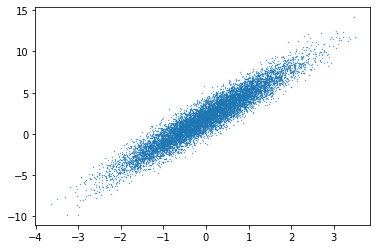

In [37]:
true_a1 = torch.tensor([3])
true_b = torch.tensor([2])
features, labels= get_data(true_a1, true_b, 10000)
plt.scatter(features, labels, s=0.1)
plt.show()

In [52]:
def data_iter(batchsize, feature, labels):
    total = len(features)
    indices = list(range(total))  #! 简单的指标
    random.shuffle(indices)  #! 给指标洗牌
    for i in range(0, total, batchsize):
        batch_indices = torch.tensor(indices[i:min(i+batchsize, total)])
        yield features[batch_indices], labels[batch_indices]

In [53]:
def calculate(x, a1_hat, b_hat):   #! 这个实际上就是网络！
    return a1_hat*x+b_hat

def L2loss(y_hat, y):
    return (y_hat-y)**2

def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad/batch_size
            param.grad.zero_()



In [60]:
batch_size = 100
lr = 0.001
num_epochs = 20
net = calculate
loss = L2loss
a1_hat = torch.normal(0, 1, size=(1, 1), requires_grad=True)
b_hat = torch.normal(0, 1, size=(1, 1), requires_grad=True)


In [94]:
for epoch in range(num_epochs):
    for x, y in data_iter(batchsize=batch_size, feature=features, labels=labels):
        y_hat = calculate(x, a1_hat, b_hat)
        l = loss(y_hat=y_hat, y=y)
        l.sum().backward()
        sgd([a1_hat, b_hat], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, a1_hat, b_hat), labels)# 计算总loss
        print(f'epoch {epoch+1}, loss {float(train_l.mean()):f}')

print(a1_hat, b_hat)

epoch 1, loss 0.979755
epoch 2, loss 0.979755
epoch 3, loss 0.979755
epoch 4, loss 0.979755
epoch 5, loss 0.979755
epoch 6, loss 0.979755
epoch 7, loss 0.979755
epoch 8, loss 0.979755
epoch 9, loss 0.979755
epoch 10, loss 0.979755
epoch 11, loss 0.979755
epoch 12, loss 0.979755
epoch 13, loss 0.979755
epoch 14, loss 0.979755
epoch 15, loss 0.979755
epoch 16, loss 0.979755
epoch 17, loss 0.979755
epoch 18, loss 0.979755
epoch 19, loss 0.979755
epoch 20, loss 0.979755
tensor([[2.9853]], requires_grad=True) tensor([[2.0033]], requires_grad=True)


torch.Size([600])
torch.Size([600])


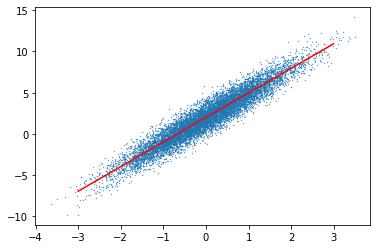

In [95]:
fig, ax = plt.subplots()
ax.scatter(features, labels, s=0.1)
xx=torch.arange(-3,3, 0.01)
print(xx.shape)
yy=(xx*torch.tensor([2.9843])+torch.tensor([2.0033]))
print(yy.shape)
ax.plot(xx, yy, color='red')
plt.show()

tensor([0, 1, 2, 3, 4])